# Cereals Dataset

## Loadind the required modules to read the data 

In [1]:
import pandas as pd
import numpy as np

import plotly.offline as py
import plotly
from plotly.offline import init_notebook_mode, iplot

import plotly.graph_objs as go

from plotly.offline import init_notebook_mode
init_notebook_mode(connected=True)

import warnings
warnings.filterwarnings("ignore")
np.set_printoptions(suppress=True) 


In [2]:
import os
os.getcwd()

'C:\\Users\\siddhi Golatkar\\Desktop\\INSOFE\\BATCH 76\\02-01-2020 - Clustering'

**Reading data**

In [3]:
cereals = pd.read_csv("CSE7405c_Clustering_Student_Copy\\Upload\\Cereals.csv")
cereals.head()

,name,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100%_Bran,70,4,1,130,10.0,5.0,6.0,280.0,25,3,1.0,0.33,68.402973
1,100%_Natural_Bran,120,3,5,15,2.0,8.0,8.0,135.0,0,3,1.0,1.00,33.983679
2,All-Bran,70,4,1,260,9.0,7.0,5.0,320.0,25,3,1.0,0.33,59.425505
3,All-Bran_with_Extra_Fiber,50,4,0,140,14.0,8.0,0.0,330.0,25,3,1.0,0.50,93.704912
4,Almond_Delight,110,2,2,200,1.0,14.0,8.0,NaN,25,3,1.0,0.75,34.384843


**Aggregating "name", "shelf" and "rating" to make labels**

In [4]:
cereals['label'] = cereals['name']+ ' (' + cereals['shelf'].astype(str) + " - " + round(cereals['rating'],2).astype(str) + ')'
cereals.drop(['name','shelf','rating'], axis=1, inplace=True)

**Data Exploration**

In [5]:
cereals.head()

,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,weight,cups,label
0,70,4,1,130,10.0,5.0,6.0,280.0,25,1.0,0.33,100%_Bran (3 - 68.4)
1,120,3,5,15,2.0,8.0,8.0,135.0,0,1.0,1.00,100%_Natural_Bran (3 - 33.98)
2,70,4,1,260,9.0,7.0,5.0,320.0,25,1.0,0.33,All-Bran (3 - 59.43)
3,50,4,0,140,14.0,8.0,0.0,330.0,25,1.0,0.50,All-Bran_with_Extra_Fiber (3 - 93.7)
4,110,2,2,200,1.0,14.0,8.0,NaN,25,1.0,0.75,Almond_Delight (3 - 34.38)


**Check summary statistics**

In [6]:
cereals.describe()

,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,weight,cups
count,77.000000,77.000000,77.000000,77.000000,77.000000,76.000000,76.000000,75.000000,77.000000,77.000000,77.000000
mean,106.883117,2.545455,1.012987,159.675325,2.151948,14.802632,7.026316,98.666667,28.246753,1.029610,0.821039
std,19.484119,1.094790,1.006473,83.832295,2.383364,3.907326,4.378656,70.410636,22.342523,0.150477,0.232716
min,50.000000,1.000000,0.000000,0.000000,0.000000,5.000000,0.000000,15.000000,0.000000,0.500000,0.250000
25%,100.000000,2.000000,0.000000,130.000000,1.000000,12.000000,3.000000,42.500000,25.000000,1.000000,0.670000
50%,110.000000,3.000000,1.000000,180.000000,2.000000,14.500000,7.000000,90.000000,25.000000,1.000000,0.750000
75%,110.000000,3.000000,2.000000,210.000000,3.000000,17.000000,11.000000,120.000000,25.000000,1.000000,1.000000
max,160.000000,6.000000,5.000000,320.000000,14.000000,23.000000,15.000000,330.000000,100.000000,1.500000,1.500000


In [7]:
cereals.columns

Index(['calories', 'protein', 'fat', 'sodium', 'fiber', 'carbo', 'sugars',
       'potass', 'vitamins', 'weight', 'cups', 'label'],
      dtype='object')

**Decouple label from the features**

In [8]:
## Select all columns except "label"

cereals_label = cereals['label']

cereals = cereals[cereals.columns.difference(['label'])]

In [9]:
cereals.columns

Index(['calories', 'carbo', 'cups', 'fat', 'fiber', 'potass', 'protein',
       'sodium', 'sugars', 'vitamins', 'weight'],
      dtype='object')

## Check missing values

In [10]:
cereals.isnull().sum()

calories    0
carbo       1
cups        0
fat         0
fiber       0
potass      2
protein     0
sodium      0
sugars      1
vitamins    0
weight      0
dtype: int64

In [11]:
cereals.shape

(77, 11)

## Imputation

In [12]:
from sklearn.impute import SimpleImputer

mean_Imputer = SimpleImputer()

imputed_cereals = pd.DataFrame(mean_Imputer.fit_transform(cereals),
                               columns=cereals.columns)

**Checking for Null values again**

In [13]:
imputed_cereals.isnull().sum(axis=0)

calories    0
carbo       0
cups        0
fat         0
fiber       0
potass      0
protein     0
sodium      0
sugars      0
vitamins    0
weight      0
dtype: int64

## Standardization

In [14]:
from sklearn.preprocessing import StandardScaler

standardizer = StandardScaler()

standardizer.fit(imputed_cereals)

std_x = standardizer.transform(imputed_cereals)

std_cereals = pd.DataFrame(std_x, columns=imputed_cereals.columns)

std_cereals.head() 

,calories,carbo,cups,fat,fiber,potass,protein,sodium,sugars,vitamins,weight
0,-1.905397,-2.542013,-2.123870,-0.012988,3.314439,2.627053,1.337319,-0.356306,-0.237495,-0.14627,-0.198067
1,0.677623,-1.764055,0.774053,3.987349,-0.064172,0.526376,0.417912,-1.737087,0.225316,-1.27255,-0.198067
2,-1.905397,-2.023374,-2.123870,-0.012988,2.892113,3.206550,1.337319,1.204578,-0.468901,-0.14627,-0.198067
3,-2.938605,-1.764055,-1.388576,-1.013072,5.003745,3.351425,1.337319,-0.236238,-1.625929,-0.14627,-0.198067
4,0.161019,-0.208138,-0.307262,0.987096,-0.486498,0.000000,-0.501495,0.484170,0.225316,-0.14627,-0.198067


In [15]:
std_cereals.describe()

,calories,carbo,cups,fat,fiber,potass,protein,sodium,sugars,vitamins,weight
count,7.700000e+01,7.700000e+01,7.700000e+01,7.700000e+01,7.700000e+01,7.700000e+01,7.700000e+01,7.700000e+01,7.700000e+01,7.700000e+01,7.700000e+01
mean,-1.258012e-16,-4.527403e-16,1.665335e-16,1.013349e-16,1.463476e-16,-4.758099e-17,5.767392e-17,-5.190653e-17,-2.144749e-16,5.190653e-17,-1.982541e-16
std,1.006557e+00,1.006557e+00,1.006557e+00,1.006557e+00,1.006557e+00,1.006557e+00,1.006557e+00,1.006557e+00,1.006557e+00,1.006557e+00,1.006557e+00
min,-2.938605e+00,-2.542013e+00,-2.469891e+00,-1.013072e+00,-9.088244e-01,-1.212115e+00,-1.420902e+00,-1.917189e+00,-1.625929e+00,-1.272550e+00,-3.542628e+00
25%,-3.555846e-01,-7.267769e-01,-6.532825e-01,-1.013072e+00,-4.864980e-01,-7.774919e-01,-5.014948e-01,-3.563056e-01,-9.317120e-01,-1.462701e-01,-1.980675e-01
50%,1.610194e-01,-4.606439e-16,-3.072619e-01,-1.298811e-02,-6.417167e-02,-1.255577e-01,4.179123e-01,2.440343e-01,-6.089621e-03,-1.462701e-01,-1.980675e-01
75%,1.610194e-01,5.698204e-01,7.740527e-01,9.870962e-01,3.581547e-01,3.090651e-01,4.179123e-01,6.042382e-01,9.195328e-01,-1.462701e-01,-1.980675e-01
max,2.744040e+00,2.125737e+00,2.936682e+00,3.987349e+00,5.003745e+00,3.351425e+00,3.176134e+00,1.924986e+00,1.845155e+00,3.232570e+00,3.146493e+00


Note - Clustering is an unsupervised method and hence we are not concerned about train-test split or prediction accuracies.
<br> **Agglomerative Clustering**
<br> Parameter description
<br> n_clusters : The number of clusters to find.
linkage : {“ward”, “complete”, “average”}
<br>- ward minimizes the variance of the clusters being merged.
<br>- complete uses the maximum distances between all observations of the two sets.
<br>- average uses the average of the distances of each observation of the two sets.
<br> affinity : {“euclidean”, “l1”, “l2”, “manhattan”, “cosine”}
<br> Metric used to compute the linkage.

In [18]:
cereals_label

0                     100%_Bran (3 - 68.4)
1            100%_Natural_Bran (3 - 33.98)
2                     All-Bran (3 - 59.43)
3     All-Bran_with_Extra_Fiber (3 - 93.7)
4               Almond_Delight (3 - 34.38)
                      ...                 
72                     Triples (3 - 39.11)
73                        Trix (2 - 27.75)
74                  Wheat_Chex (1 - 49.79)
75                    Wheaties (1 - 51.59)
76         Wheaties_Honey_Gold (1 - 36.19)
Name: label, Length: 77, dtype: object

In [22]:
cereals_label = pd.DataFrame(cereals_label)

In [23]:
cereals_label

,label
0,100%_Bran (3 - 68.4)
1,100%_Natural_Bran (3 - 33.98)
2,All-Bran (3 - 59.43)
3,All-Bran_with_Extra_Fiber (3 - 93.7)
4,Almond_Delight (3 - 34.38)
...,...
72,Triples (3 - 39.11)
73,Trix (2 - 27.75)
74,Wheat_Chex (1 - 49.79)
75,Wheaties (1 - 51.59)


## dendrogram

<IPython.core.display.Javascript object>


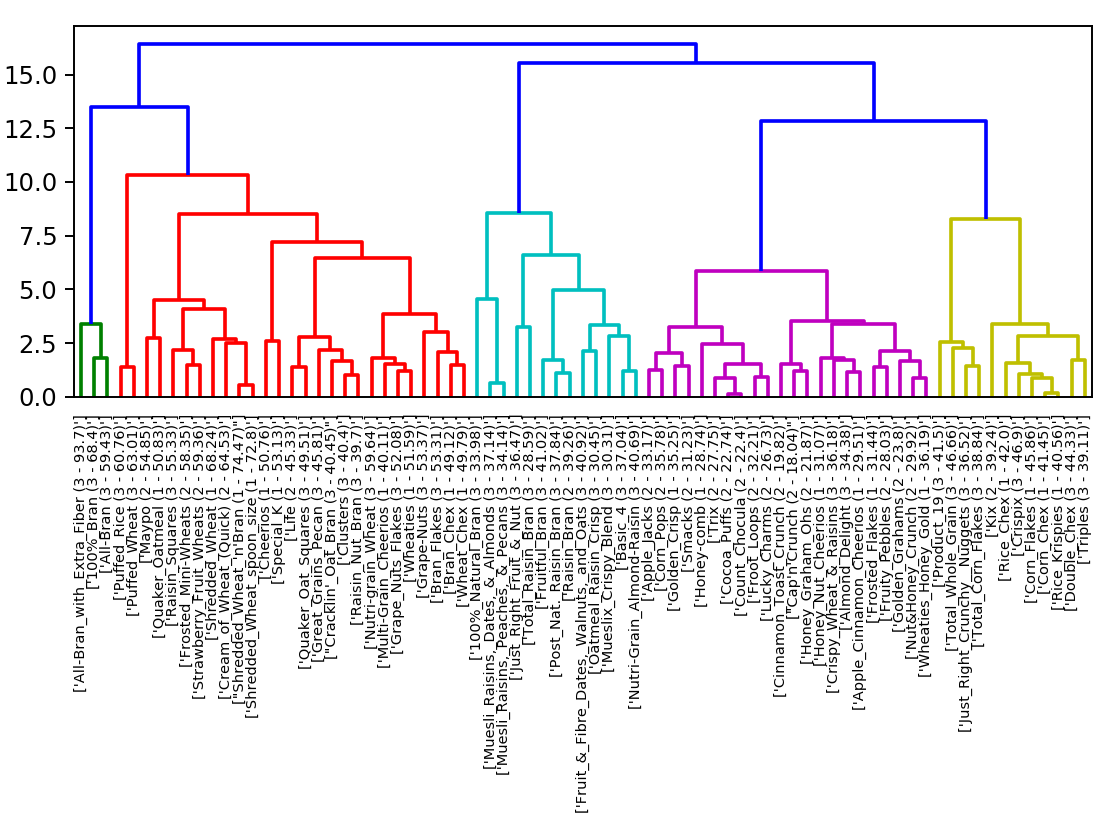

In [25]:
# loading the models 

from scipy.cluster.hierarchy import linkage,dendrogram

import matplotlib.pyplot as plt

%matplotlib notebook

# Preparing linkage matrix

linkage_matrix = linkage(std_cereals, method='ward',metric='euclidean')

#plotting

dendrogram(linkage_matrix, labels=cereals_label.to_numpy())

plt.tight_layout()

plt.show()

In [26]:
type(linkage_matrix)

numpy.ndarray

In [30]:
cereals_label = cereals_label['label']

In [31]:
cereals_label

0                     100%_Bran (3 - 68.4)
1            100%_Natural_Bran (3 - 33.98)
2                     All-Bran (3 - 59.43)
3     All-Bran_with_Extra_Fiber (3 - 93.7)
4               Almond_Delight (3 - 34.38)
                      ...                 
72                     Triples (3 - 39.11)
73                        Trix (2 - 27.75)
74                  Wheat_Chex (1 - 49.79)
75                    Wheaties (1 - 51.59)
76         Wheaties_Honey_Gold (1 - 36.19)
Name: label, Length: 77, dtype: object

In [32]:
from sklearn.cluster import AgglomerativeClustering

## Instantiating object

agg_clust = AgglomerativeClustering(n_clusters=6,
                                    affinity="euclidean",
                                    linkage = "ward")

## Training model and return class labels

agg_clusters = agg_clust.fit_predict(std_cereals)

## Label - Cluster

agg_result = pd.DataFrame({"labels":cereals_label,
                           "agg_cluster":agg_clusters
                          }).sort_values("agg_cluster")

agg_result.agg_cluster.value_counts()


2    25
4    22
0    13
1    12
3     3
5     2
Name: agg_cluster, dtype: int64

In [33]:
agg_result.head()

,labels,agg_cluster
49,Nutri-Grain_Almond-Raisin (3 - 40.69),0
1,100%_Natural_Bran (3 - 33.98),0
46,Mueslix_Crispy_Blend (3 - 30.31),0
45,"Muesli_Raisins,_Peaches,_&_Pecans (3 - 34.14)",0
44,"Muesli_Raisins,_Dates,_&_Almonds (3 - 37.14)",0


In [34]:
agg_result[0:20]

,labels,agg_cluster
49,Nutri-Grain_Almond-Raisin (3 - 40.69),0
1,100%_Natural_Bran (3 - 33.98),0
46,Mueslix_Crispy_Blend (3 - 30.31),0
45,"Muesli_Raisins,_Peaches,_&_Pecans (3 - 34.14)",0
44,"Muesli_Raisins,_Dates,_&_Almonds (3 - 37.14)",0
70,Total_Raisin_Bran (3 - 28.59),0
51,Oatmeal_Raisin_Crisp (3 - 30.45),0
7,Basic_4 (3 - 37.04),0
39,Just_Right_Fruit_&_Nut (3 - 36.47),0
52,Post_Nat._Raisin_Bran (3 - 37.84),0


**K-Means Clustering**
<br>Parameter description
<br>n_clusters : The number of clusters to find.
<br>tol : Relative tolerance with regards to inertia to declare convergence
<br>n_init : Number of time the k-means algorithm will be run with different centroid seeds. The final results will be the best output of n_init consecutive runs in terms of inertia.
<br>max_iter : max iterations of recomputing new cluster centroids
<br>n_jobs : The number of jobs to use for the computation. This works by computing each of the n_init runs in parallel.

In [35]:
from sklearn.cluster import KMeans

kmeans_object = KMeans(n_clusters=6, random_state=123)

kmeans_object.fit(std_cereals)

kmeans_clusters = kmeans_object.predict(std_cereals)

kmeans_result = pd.DataFrame({"labels":cereals_label,
                              "kmeans_cluster":kmeans_clusters})

kmeans_result.head()

,labels,kmeans_cluster
0,100%_Bran (3 - 68.4),3
1,100%_Natural_Bran (3 - 33.98),1
2,All-Bran (3 - 59.43),3
3,All-Bran_with_Extra_Fiber (3 - 93.7),3
4,Almond_Delight (3 - 34.38),0


**Inspecting cluster centroids to understand average statistics of each cluster**

In [36]:
kmeans_object.cluster_centers_

array([[ 0.20798344, -0.59711721,  0.20980312,  0.03247027, -0.65926792,
        -0.70922536, -0.91940708,  0.12396629,  0.99316184, -0.14627013,
        -0.19806746],
       [ 0.47098186, -0.53740549, -0.66625832,  1.58714684,  0.19767068,
         0.44669564,  0.96955656, -0.66848239,  0.11022214, -0.37152613,
        -0.19806746],
       [-1.18215105,  0.284569  ,  0.1858176 , -0.91306402, -0.06417167,
        -0.10575821, -0.04179123, -1.80312481, -1.13997707, -0.82203813,
        -0.98069456],
       [-2.24979938, -2.10981415, -1.87877244, -0.34634956,  3.73676565,
         3.06167606,  1.33731939,  0.20401161, -0.77744163, -0.14627013,
        -0.19806746],
       [ 1.29754831,  0.19380719, -0.48027221,  0.38704563,  0.63266684,
         1.06965497,  0.41791231,  0.38811585,  0.89639222,  0.52949787,
         2.10967911],
       [-0.16772858,  0.91165064,  0.48308082, -0.4675719 , -0.19854824,
        -0.34945428,  0.12537369,  0.79525546, -0.82652766,  0.46806441,
        -0.198

In [37]:
cluster_centroids = pd.DataFrame(standardizer.inverse_transform(kmeans_object.cluster_centers_),
                                 columns = cereals.columns)
cluster_centroids

,calories,carbo,cups,fat,fiber,potass,protein,sodium,sugars,vitamins,weight
0,110.909091,12.500000,0.869545,1.045455,0.590909,49.712121,1.545455,170.000000,11.318182,25.000000,1.000
1,116.000000,12.730263,0.667000,2.600000,2.620000,129.500000,3.600000,104.000000,7.502632,20.000000,1.000
2,84.000000,15.900000,0.864000,0.100000,2.000000,91.366667,2.500000,9.500000,2.100000,10.000000,0.883
3,63.333333,6.666667,0.386667,0.666667,11.000000,310.000000,4.000000,176.666667,3.666667,25.000000,1.000
4,132.000000,15.550000,0.710000,1.400000,3.650000,172.500000,3.000000,192.000000,10.900000,40.000000,1.345
5,103.636364,18.318182,0.932727,0.545455,1.681818,74.545455,2.681818,225.909091,3.454545,38.636364,1.000


**Selecting the best k value - using Elbow plot**
<br>Error Sum of Squares (SSE) SSE is the sum of the squared differences between each observation and its group's mean. It can be used as a measure of variation within a cluster.

In [38]:
sse = {}
for k in range(1, 20):
    kmeans = KMeans(n_clusters=k, max_iter=1000,random_state=1234).fit(std_cereals)
    std_cereals["clusters"] = kmeans.labels_
    
    #print(std_cereals["clusters"])
    sse[k] = kmeans.inertia_ 
    
    # Inertia: Sum of distances of samples to their closest cluster center

<IPython.core.display.Javascript object>


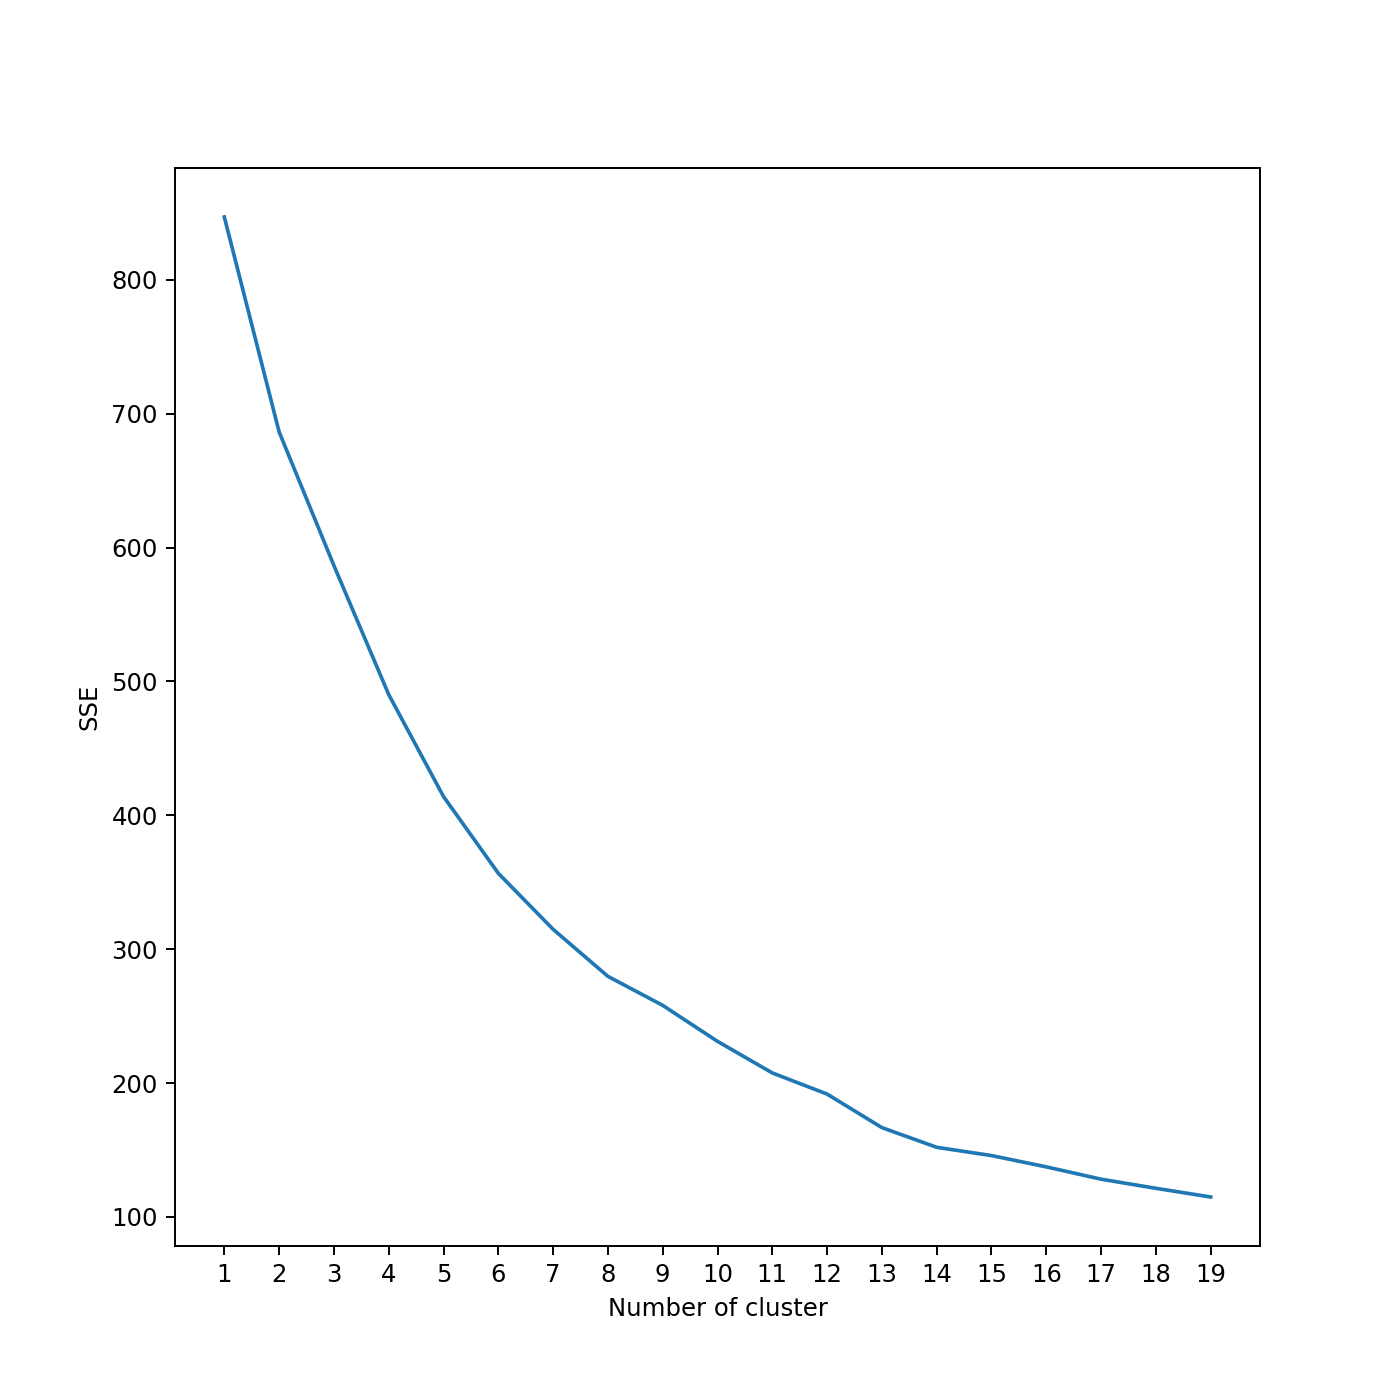

In [39]:
#Using Matplotlib

xlabels = list(sse.keys())

plt.figure(figsize=(8,8))

plt.plot(list(sse.keys()), list(sse.values()))

plt.xlabel("Number of cluster")

plt.xticks(xlabels)

plt.ylabel("SSE")

plt.show()

In [40]:
trace0=go.Scatter(type="scatter",
                   x=list(sse.keys()),
                  y=list(sse.values()))

data=[trace0]

layout = go.Layout(title = 'Number of Clusters Vs SSE ',xaxis=dict(title= 'Number of Clusters'),
                   yaxis=dict(title= 'SSE'))

    
fig = go.Figure(data=data, layout=layout)    
iplot(fig)

How to select best K value for K-Means -> **Silhouette Analysis**
<br>Higher the silhouette score better the clustering
The silhouette value is a measure of how similar an object is to its own cluster (cohesion) compared to other clusters (separation). The silhouette ranges from −1 to +1, where a high value indicates that the object is well matched to its own cluster and poorly matched to neighboring clusters. If most objects have a high value, then the clustering configuration is appropriate. If many points have a low or negative value, then the clustering configuration may have too many or too few clusters.
<br>Silhouette analysis can be used to study the separation distance between the resulting clusters. The silhouette plot displays a measure of how close each point in one cluster is to points in the neighboring clusters and thus provides a way to assess parameters like number of clusters visually.

Automatically created module for IPython interactive environment


<IPython.core.display.Javascript object>


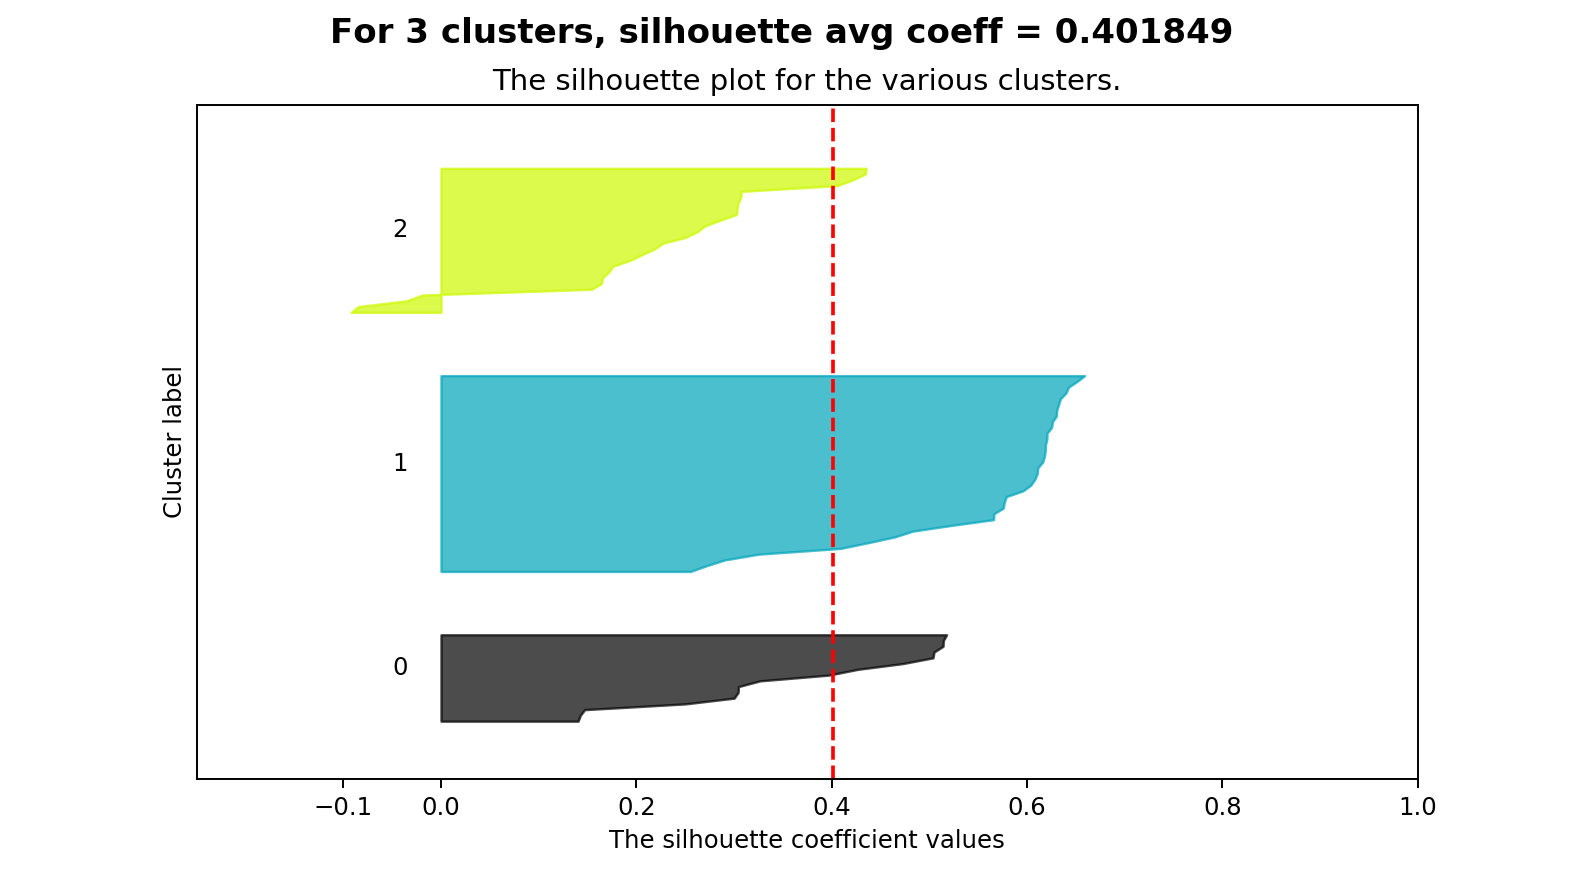

<IPython.core.display.Javascript object>


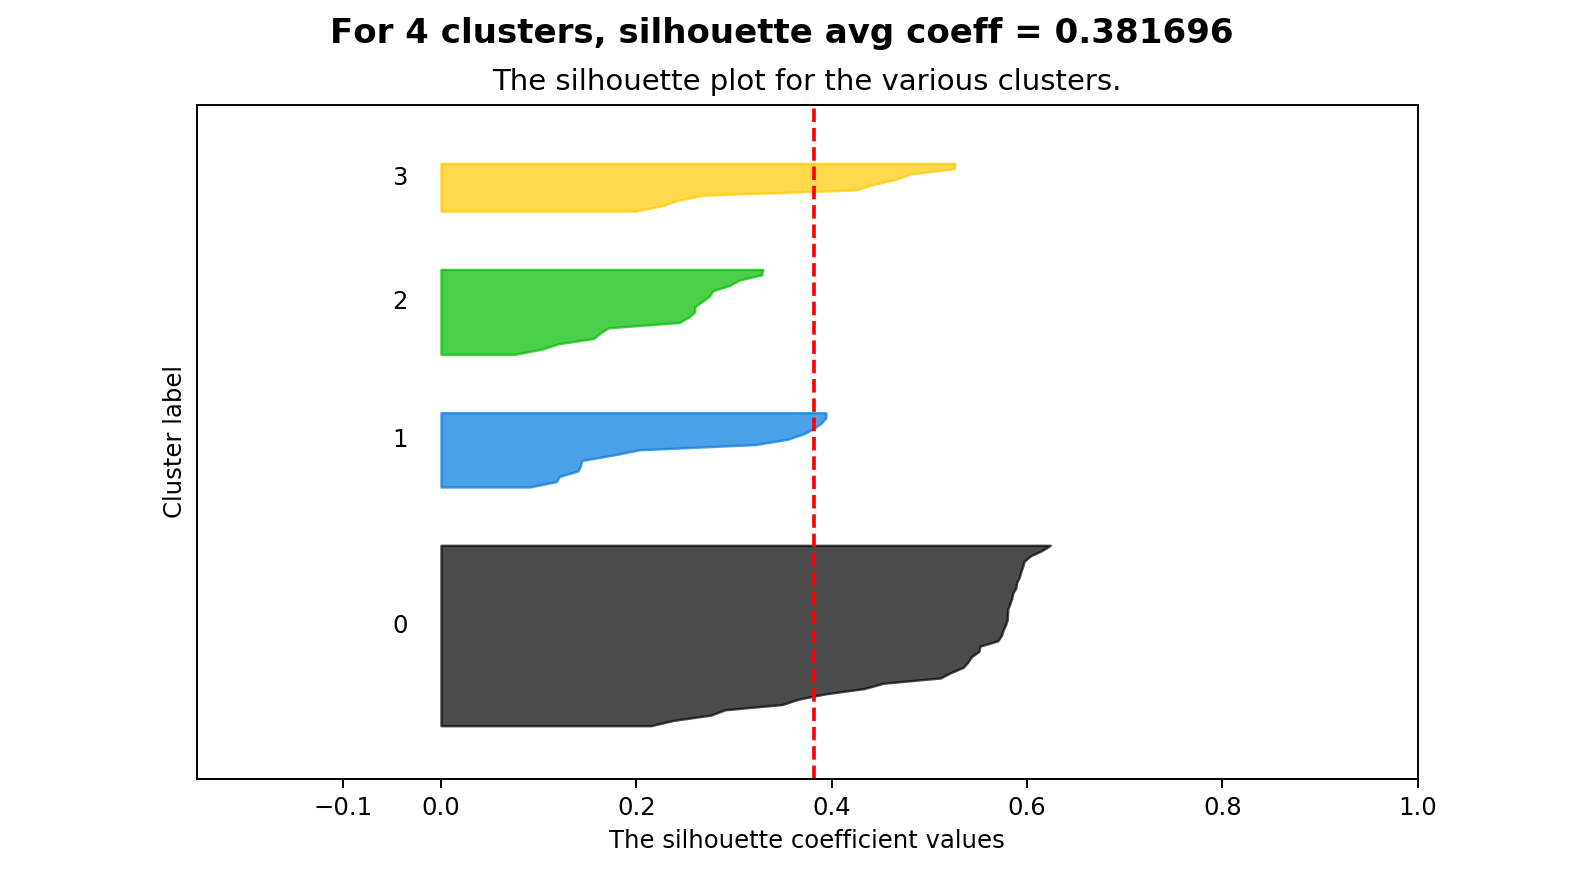

<IPython.core.display.Javascript object>


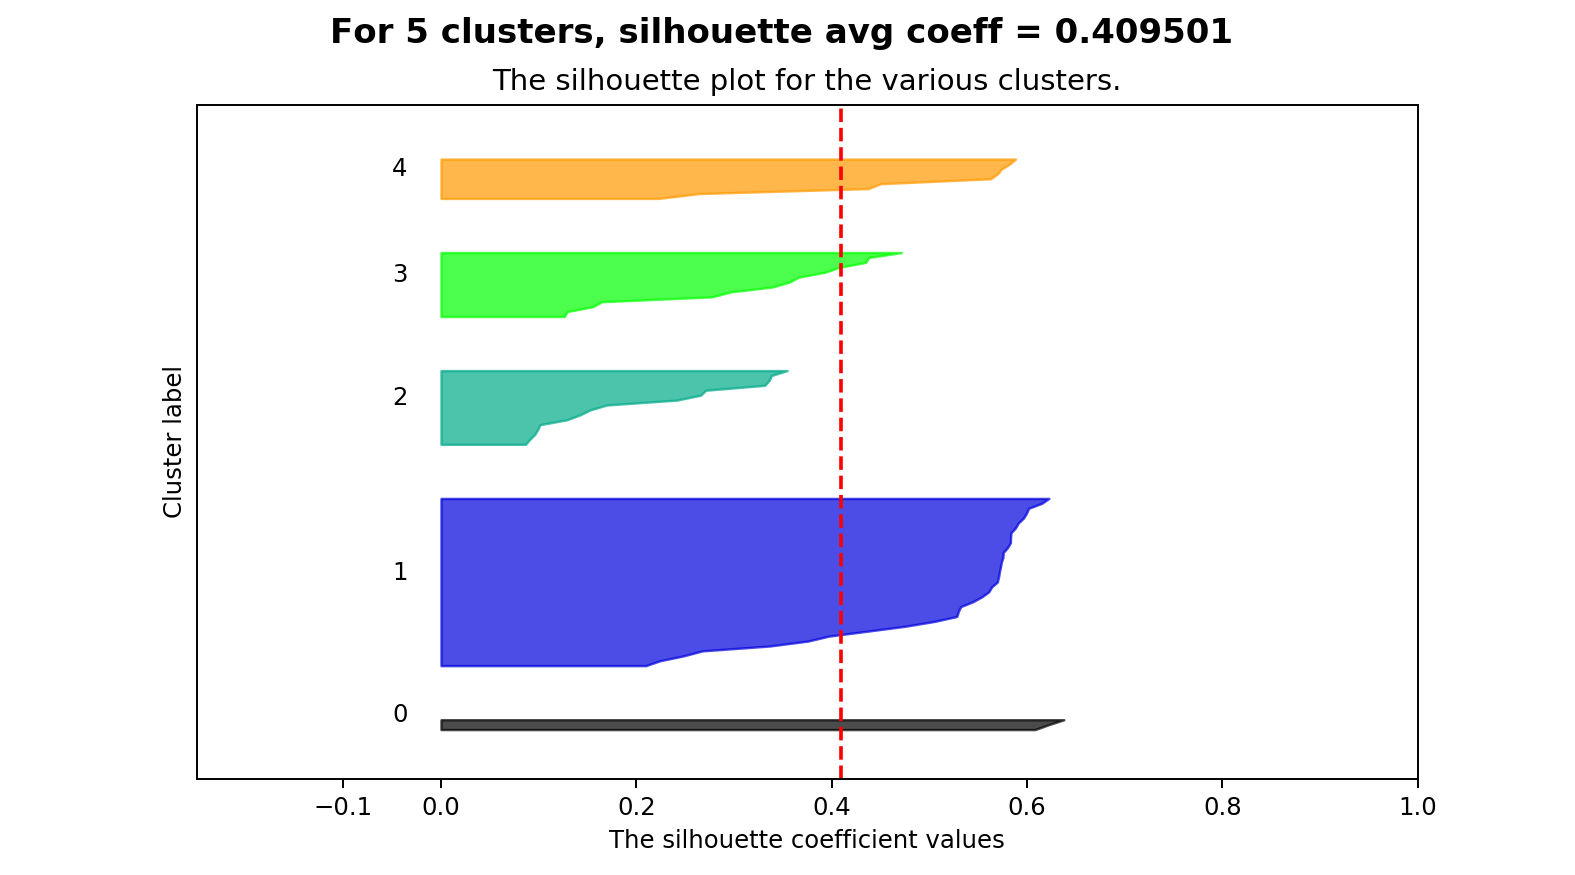

<IPython.core.display.Javascript object>


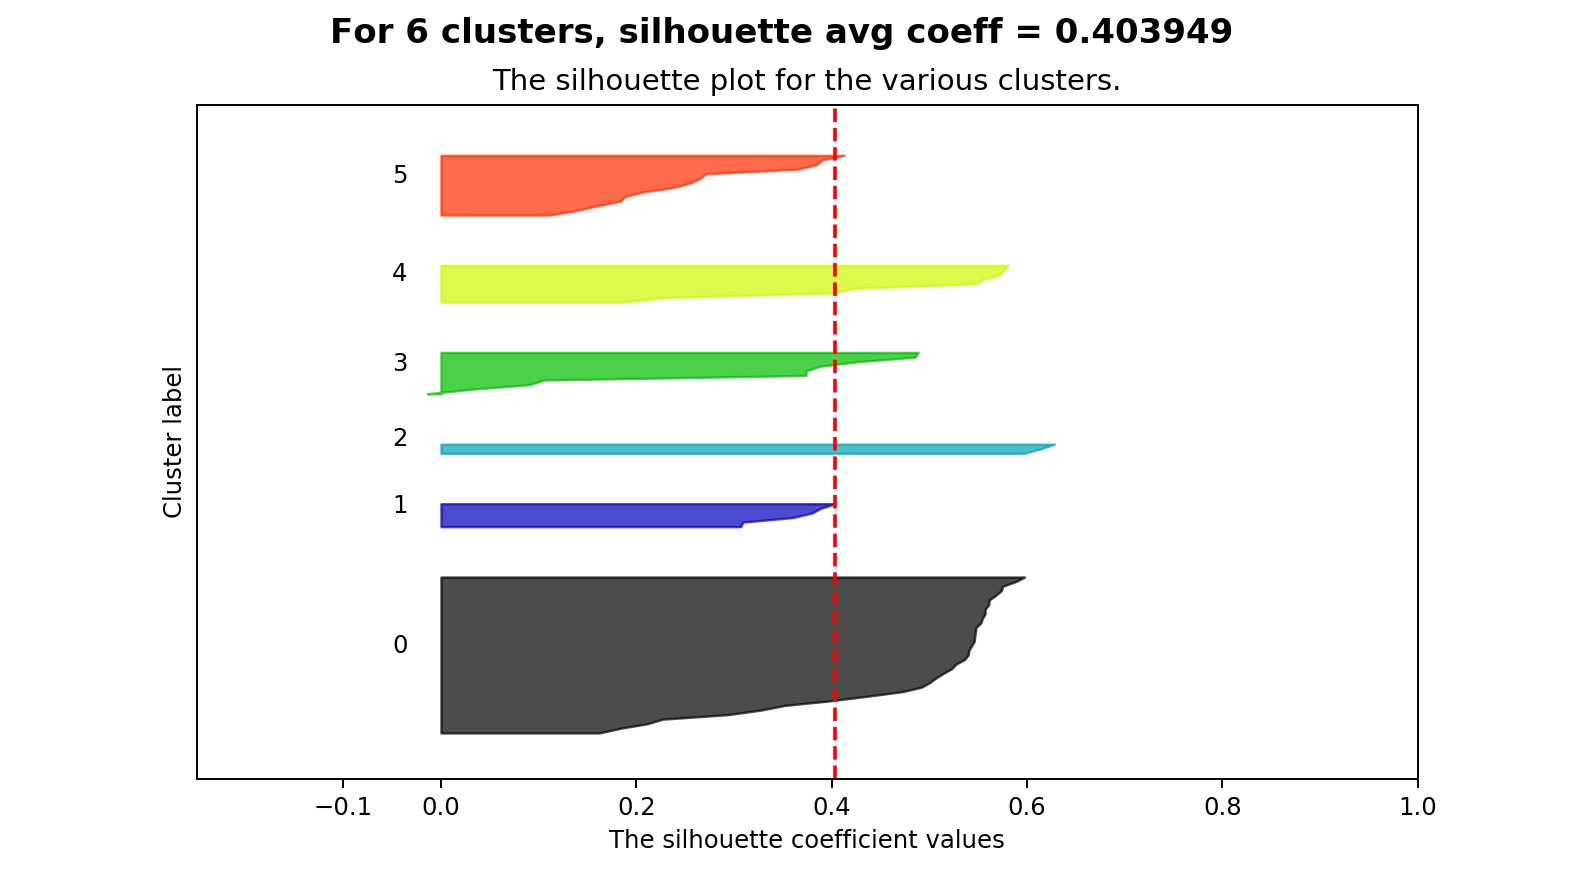

<IPython.core.display.Javascript object>


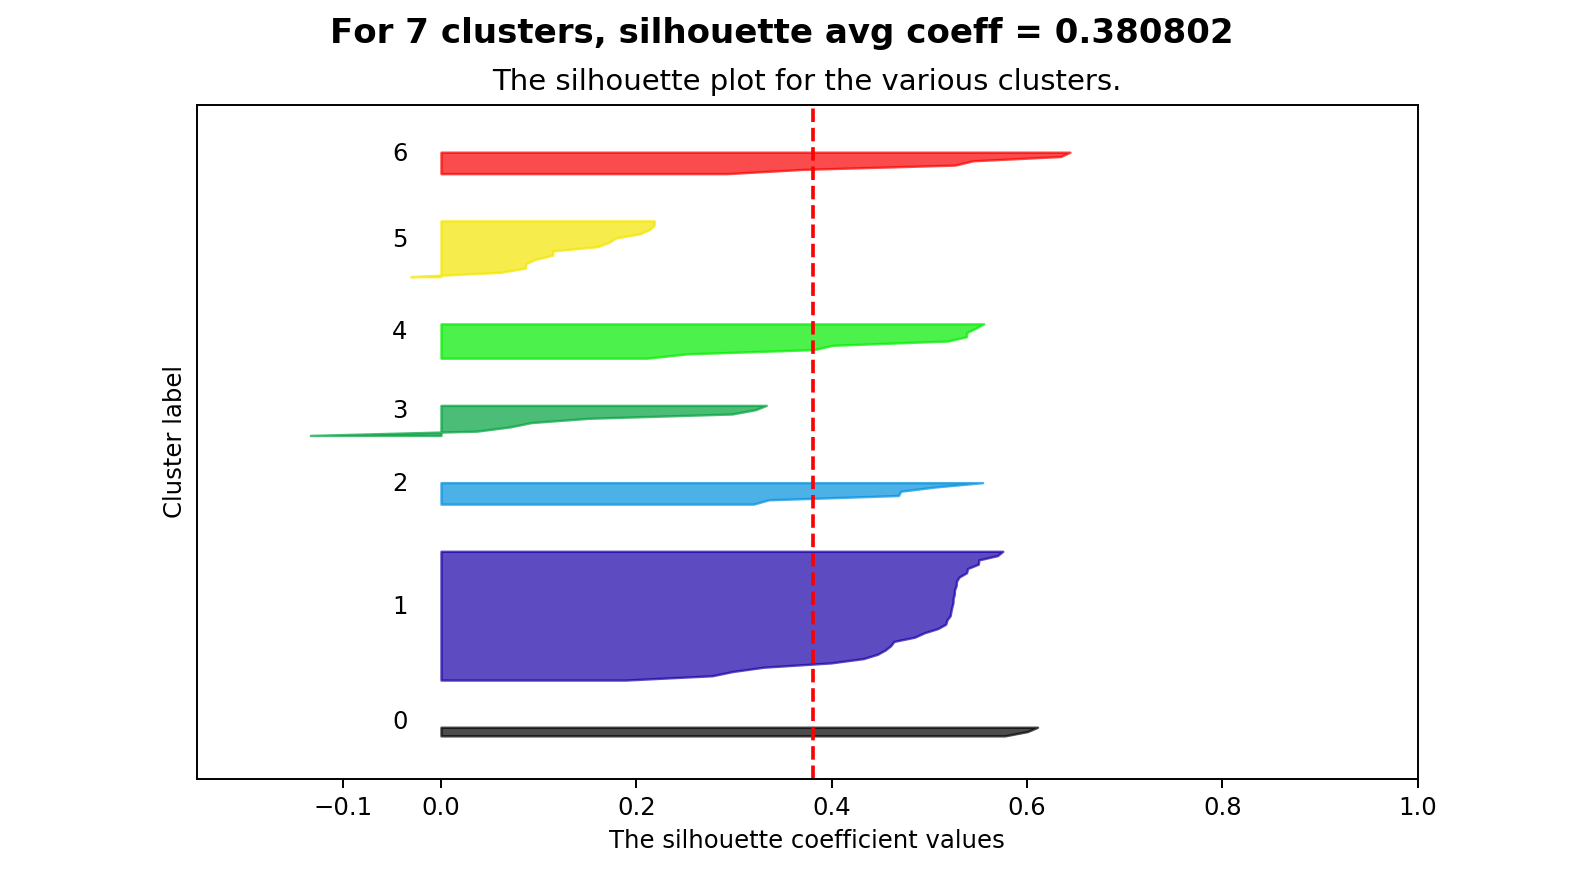

<IPython.core.display.Javascript object>


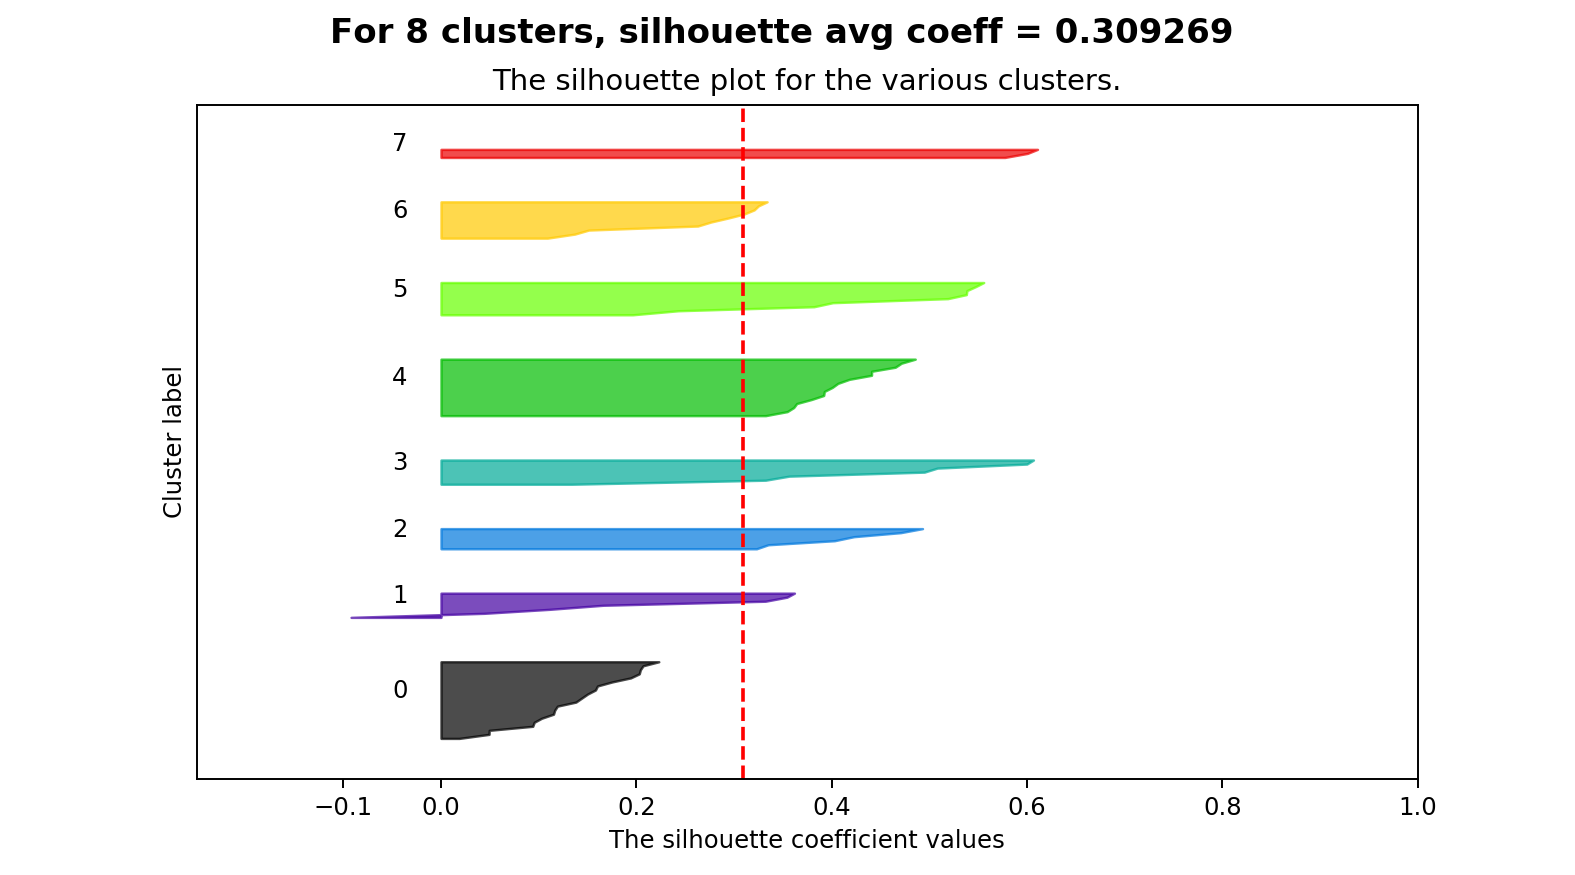

<IPython.core.display.Javascript object>


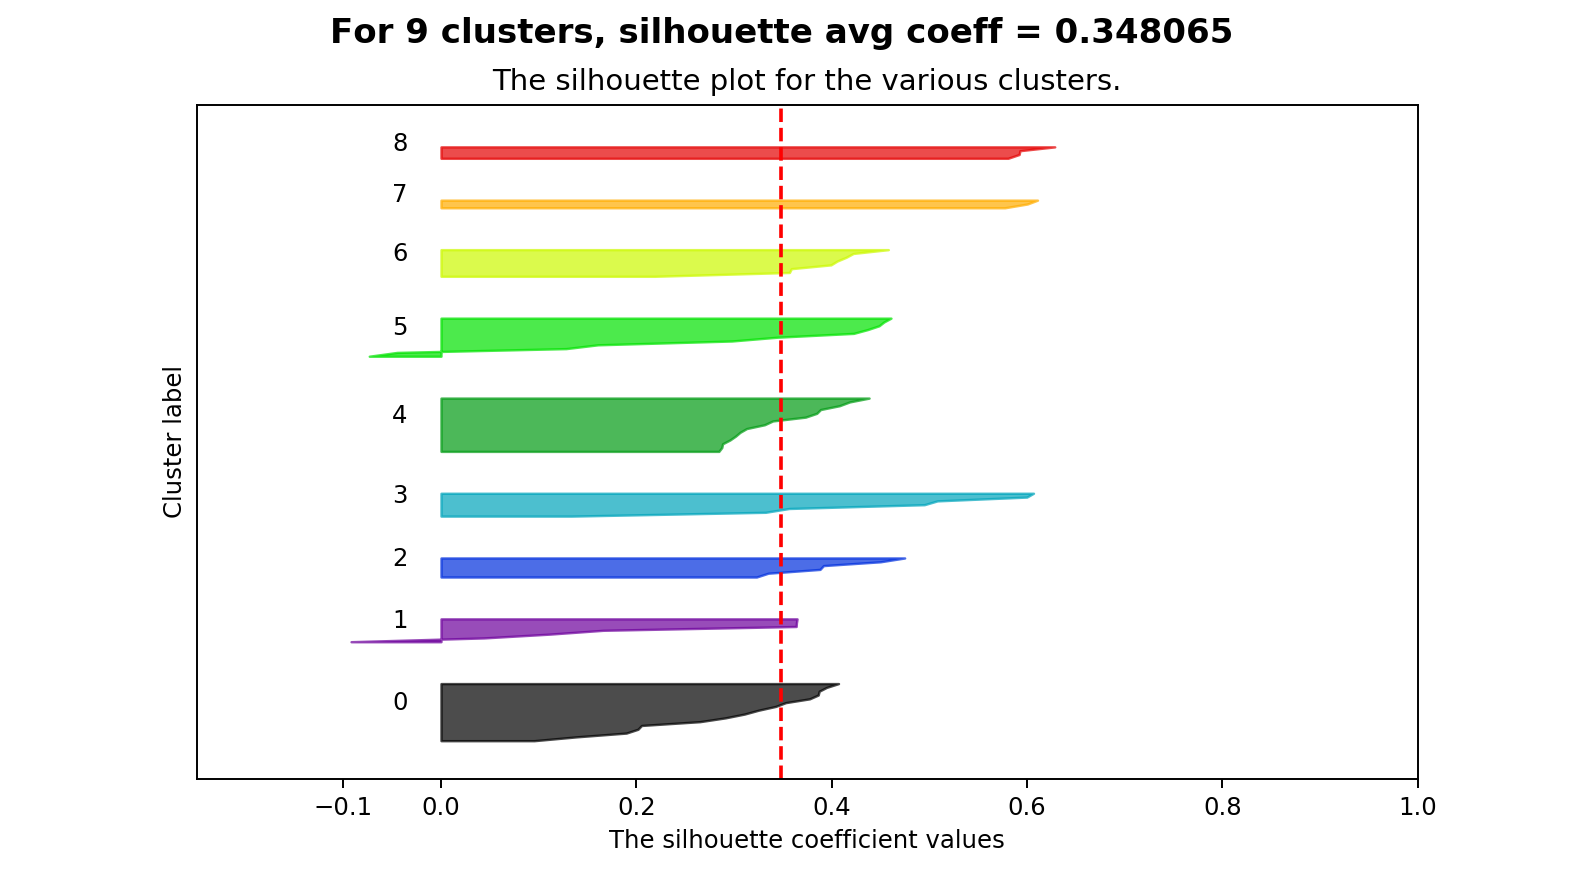

<IPython.core.display.Javascript object>


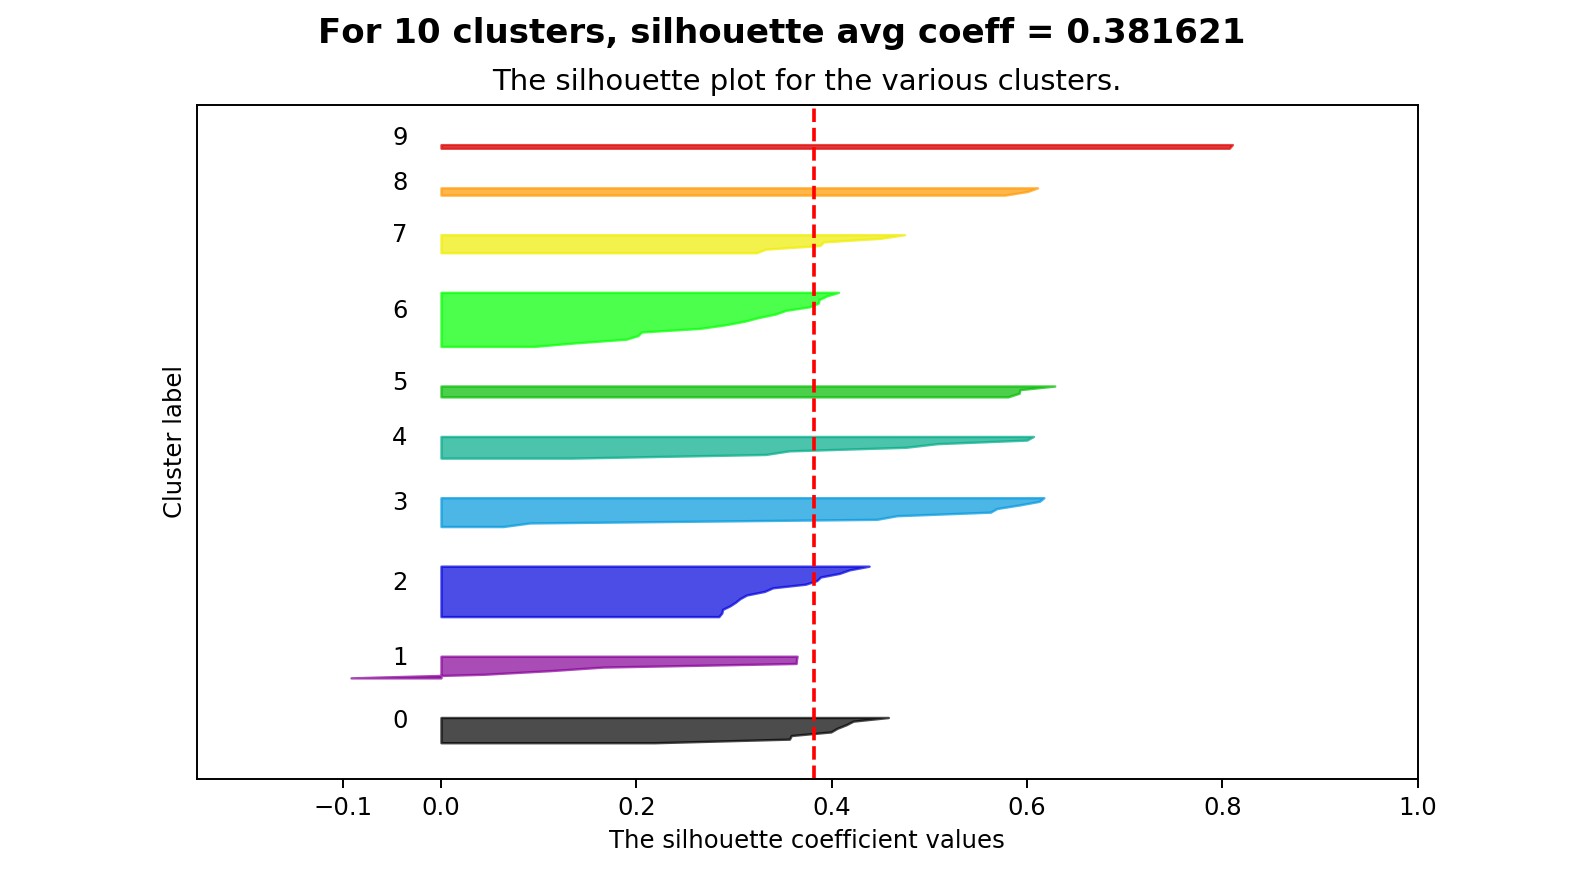

<IPython.core.display.Javascript object>


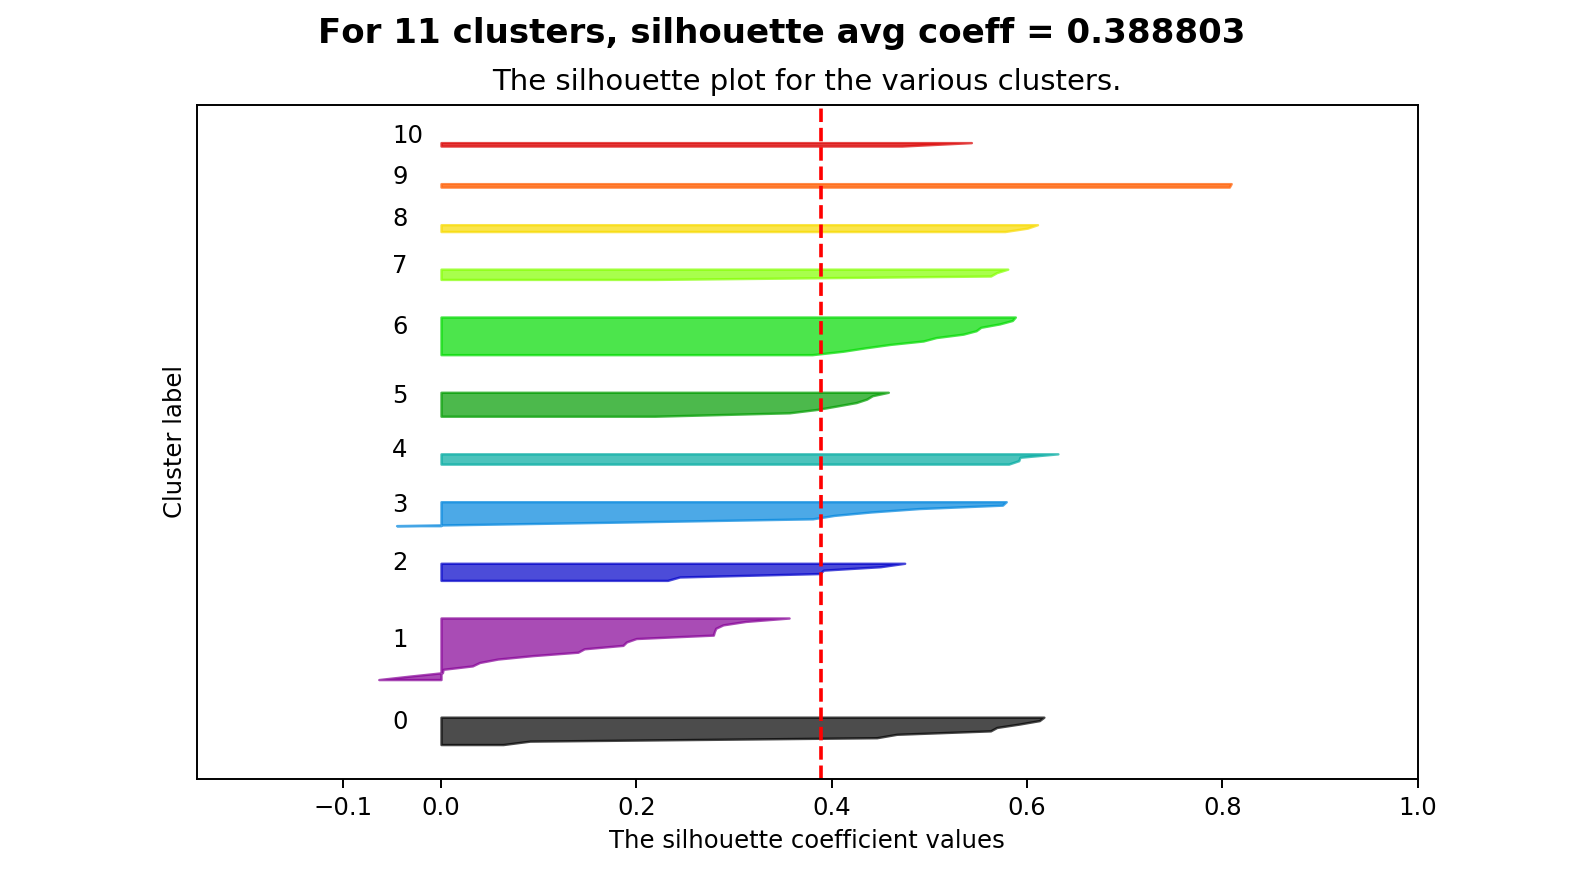

In [42]:
## Standard plotting code copied from sklearn documentation.
## Just change "X_matrix" to the data of your choice

from __future__ import print_function


from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

print(__doc__) 
##The print(__doc__) command simply re-uses that documentation string to write it 
#to your terminal each time you run the script

### Just change this to your dataframe
X_matrix = std_cereals.to_numpy()

range_n_clusters = [3, 4, 5, 6, 7, 8, 9, 10, 11]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 1 column
    fig, (ax1) = plt.subplots(1, 1)
    fig.set_size_inches(9, 5)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.25, .5])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X_matrix) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X_matrix)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X_matrix, cluster_labels)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X_matrix, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    plt.suptitle(("For %d clusters, silhouette avg coeff = %f " % (n_clusters,silhouette_avg)),
                 fontsize=14, fontweight='bold')
    plt.show()

Note - Higher the silhouette score better the clustering.
<br>Hence best K value for this dataset is 5.

In [43]:
best_kmeans = KMeans(n_clusters=5, random_state=1234)
best_kmeans.fit(std_cereals)
best_kmeans_labels = best_kmeans.predict(std_cereals)

In [44]:
cereals.head(7)

,calories,carbo,cups,fat,fiber,potass,protein,sodium,sugars,vitamins,weight
0,70,5.0,0.33,1,10.0,280.0,4,130,6.0,25,1.0
1,120,8.0,1.00,5,2.0,135.0,3,15,8.0,0,1.0
2,70,7.0,0.33,1,9.0,320.0,4,260,5.0,25,1.0
3,50,8.0,0.50,0,14.0,330.0,4,140,0.0,25,1.0
4,110,14.0,0.75,2,1.0,NaN,2,200,8.0,25,1.0
5,110,10.5,0.75,2,1.5,70.0,2,180,10.0,25,1.0
6,110,11.0,1.00,0,1.0,30.0,2,125,14.0,25,1.0


Extra Reading for Silhouette score

In [46]:
from PIL import Image

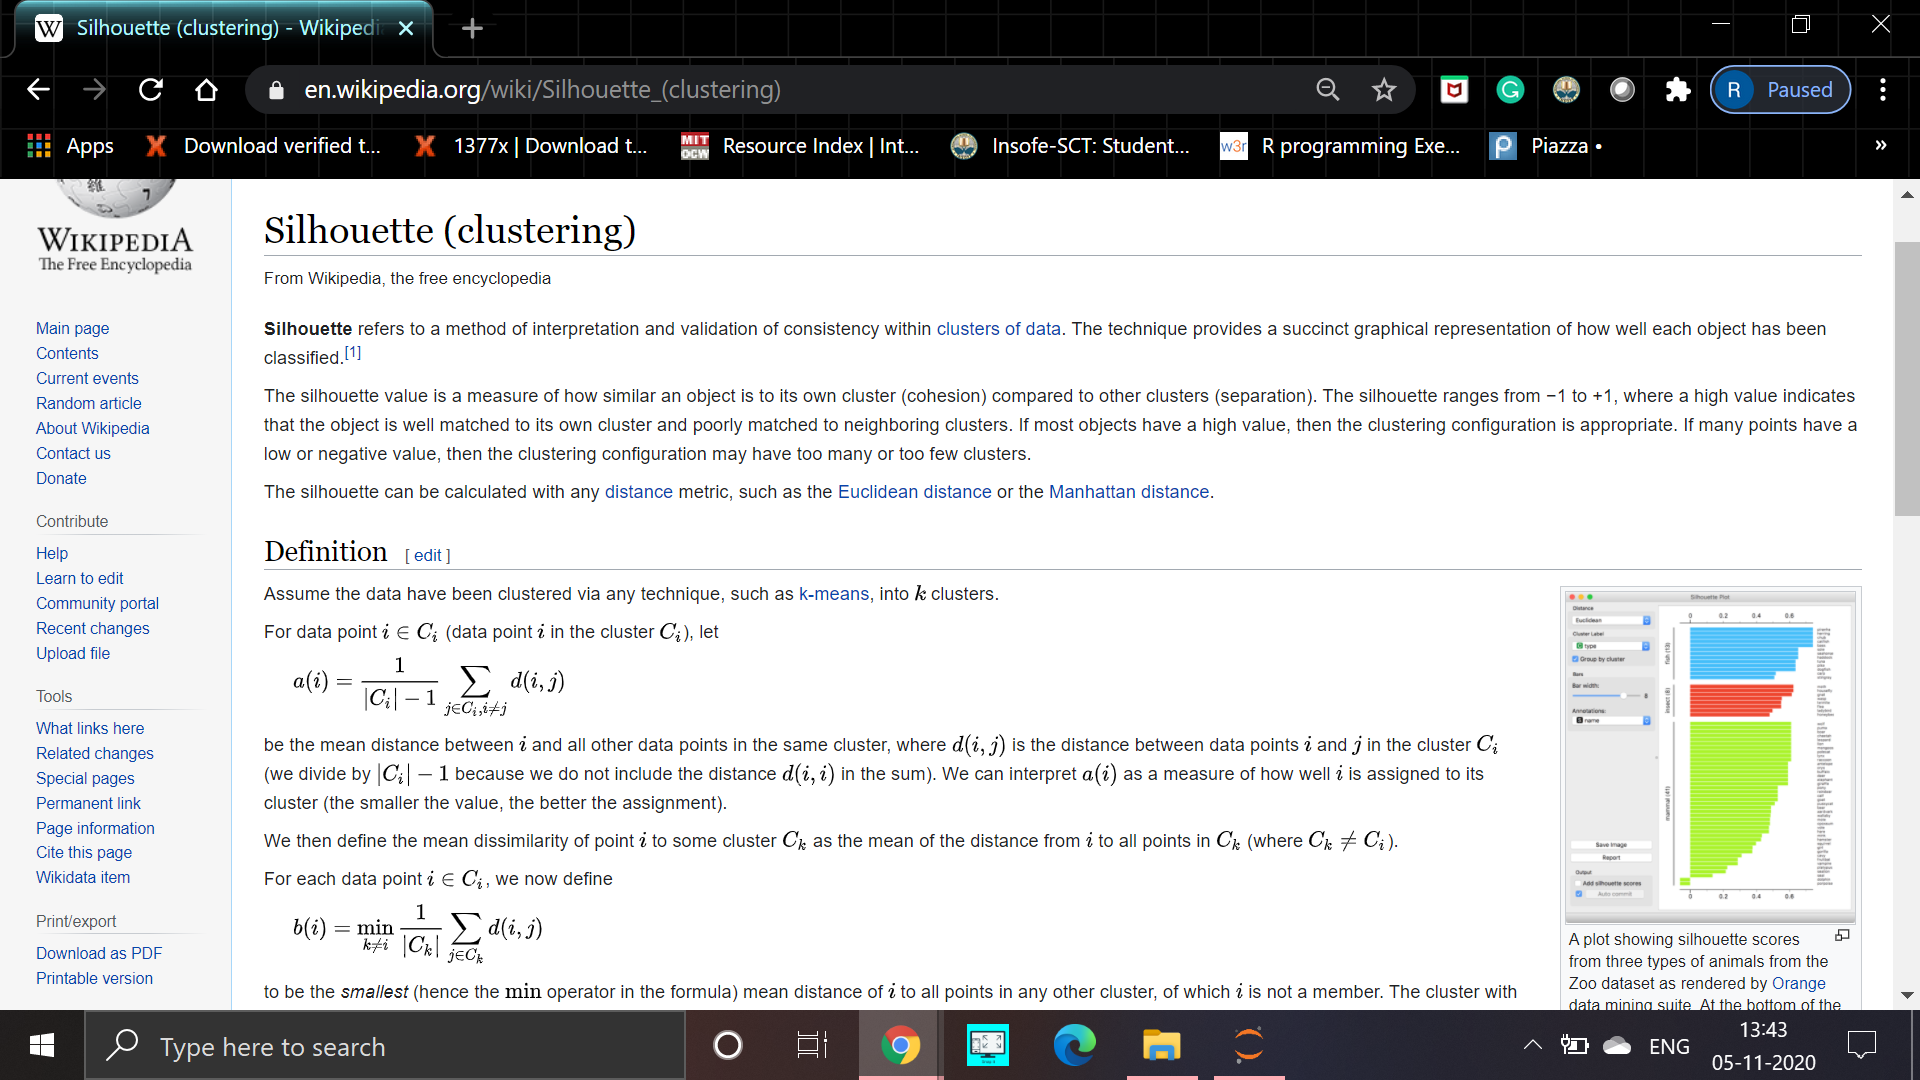

In [51]:
img  = Image.open('Capture.png')
img

Source for this reference is : 

https://en.wikipedia.org/wiki/Silhouette_(clustering)